# K-means clustering in image segmentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

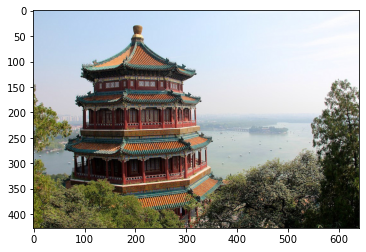

In [2]:
from sklearn.datasets import load_sample_image
image = load_sample_image("china.jpg")

plt.imshow(image);

In [3]:
image.shape

(427, 640, 3)

In [4]:
image

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [5]:
256*256*256  # total number of colors

16777216

In [6]:
X = image.reshape(-1,3)
X

array([[174, 201, 231],
       [174, 201, 231],
       [174, 201, 231],
       ...,
       [ 43,  49,  39],
       [ 13,  21,   6],
       [ 15,  24,   7]], dtype=uint8)

In [13]:
kmeans = KMeans(n_clusters=32)
kmeans.fit(X)

KMeans(n_clusters=32)

In [14]:
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image

array([[189.6548941 , 212.5214988 , 238.61287482],
       [189.6548941 , 212.5214988 , 238.61287482],
       [189.6548941 , 212.5214988 , 238.61287482],
       ...,
       [ 37.68546776,  39.21866262,  29.16585444],
       [  9.61209781,   9.40418275,   4.2979408 ],
       [ 25.54801029,  22.94812908,  15.3377549 ]])

In [15]:
segmented_image = segmented_image.reshape(image.shape)
segmented_image

array([[[189.6548941 , 212.5214988 , 238.61287482],
        [189.6548941 , 212.5214988 , 238.61287482],
        [189.6548941 , 212.5214988 , 238.61287482],
        ...,
        [243.3795082 , 246.56609836, 252.61137705],
        [243.3795082 , 246.56609836, 252.61137705],
        [243.3795082 , 246.56609836, 252.61137705]],

       [[189.6548941 , 212.5214988 , 238.61287482],
        [189.6548941 , 212.5214988 , 238.61287482],
        [189.6548941 , 212.5214988 , 238.61287482],
        ...,
        [243.3795082 , 246.56609836, 252.61137705],
        [243.3795082 , 246.56609836, 252.61137705],
        [243.3795082 , 246.56609836, 252.61137705]],

       [[189.6548941 , 212.5214988 , 238.61287482],
        [189.6548941 , 212.5214988 , 238.61287482],
        [189.6548941 , 212.5214988 , 238.61287482],
        ...,
        [243.3795082 , 246.56609836, 252.61137705],
        [243.3795082 , 246.56609836, 252.61137705],
        [243.3795082 , 246.56609836, 252.61137705]],

       ...,

      

In [16]:
new_image = segmented_image.astype(int)
new_image

array([[[189, 212, 238],
        [189, 212, 238],
        [189, 212, 238],
        ...,
        [243, 246, 252],
        [243, 246, 252],
        [243, 246, 252]],

       [[189, 212, 238],
        [189, 212, 238],
        [189, 212, 238],
        ...,
        [243, 246, 252],
        [243, 246, 252],
        [243, 246, 252]],

       [[189, 212, 238],
        [189, 212, 238],
        [189, 212, 238],
        ...,
        [243, 246, 252],
        [243, 246, 252],
        [243, 246, 252]],

       ...,

       [[ 73,  73,  24],
        [145, 136,  91],
        [122, 120,  60],
        ...,
        [ 37,  39,  29],
        [  9,   9,   4],
        [  9,   9,   4]],

       [[122, 120,  60],
        [122, 120,  60],
        [ 98,  98,  40],
        ...,
        [  9,   9,   4],
        [  9,   9,   4],
        [ 25,  22,  15]],

       [[ 98,  98,  40],
        [ 98,  98,  40],
        [ 98,  98,  40],
        ...,
        [ 37,  39,  29],
        [  9,   9,   4],
        [ 25,  22,  15]]

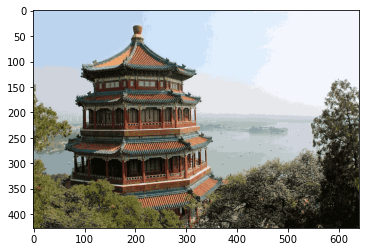

In [17]:
plt.imshow(new_image);

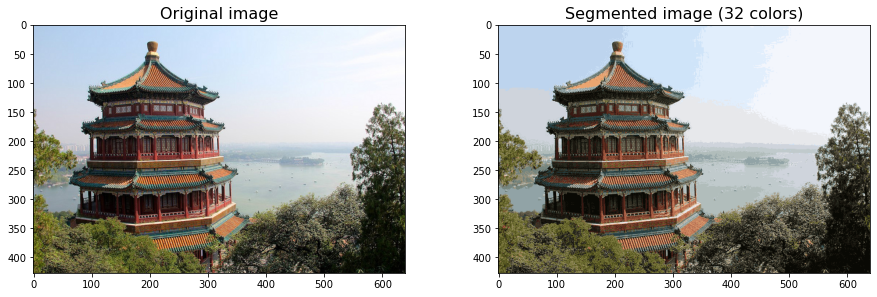

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.subplots_adjust(wspace=0.25)
ax[0].imshow(image)
ax[0].set_title('Original image', size=16)
ax[1].imshow(new_image)
ax[1].set_title('Segmented image (32 colors)', size=16);